# Vehicle Performance Perdiction

<h2>Problem Statment</h2>

<h3>Use regression analysis to predict vehicle performance (mileage i.e kilometre travelled per litre)</h3>

# Import Data & Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data.csv')

# Data Exploration

In [3]:
df.shape

(398, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [6]:
df.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [7]:
df.drop('name',axis=1,inplace=True)

# Dealing with Categorical Columns¶

In [8]:
df.select_dtypes(include='object').columns

Index(['horsepower'], dtype='object')

In [9]:
df['horsepower']=pd.get_dummies(df['horsepower'],drop_first=True)

In [10]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [11]:
corr_table=df.corr()
corr_table

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
origin,1.000000,-0.562543,-0.609409,0.026762,-0.581024,0.205873,0.180662,0.563450
cylinders,-0.562543,1.000000,0.950721,-0.042977,0.896017,-0.505419,-0.348746,-0.775396
displacement,-0.609409,0.950721,1.000000,-0.030567,0.932824,-0.543684,-0.370164,-0.804203
horsepower,0.026762,-0.042977,-0.030567,1.000000,0.010656,0.002404,-0.000137,-0.022596
weight,-0.581024,0.896017,0.932824,0.010656,1.000000,-0.417457,-0.306564,-0.831741
acceleration,0.205873,-0.505419,-0.543684,0.002404,-0.417457,1.000000,0.288137,0.420289
year,0.180662,-0.348746,-0.370164,-0.000137,-0.306564,0.288137,1.000000,0.579267
Kilometer_per_liter,0.563450,-0.775396,-0.804203,-0.022596,-0.831741,0.420289,0.579267,1.000000


# Data Visualizations
Heatmap : which represents correlation between attributes

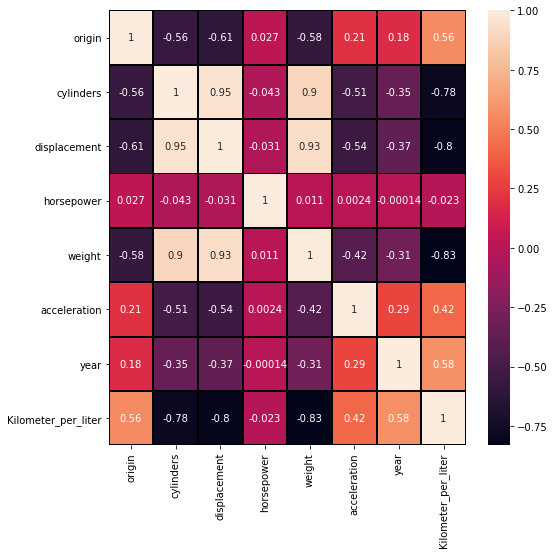

In [12]:
sns.heatmap(df.corr(),annot=True,linecolor ='black', linewidths = 1)#Heatmap is a way to show some sort of matrix plot,annot is used for correlation.
fig=plt.gcf()
fig.set_size_inches(8,8)

Visualizations of each attributes w.r.t rest of all attributes

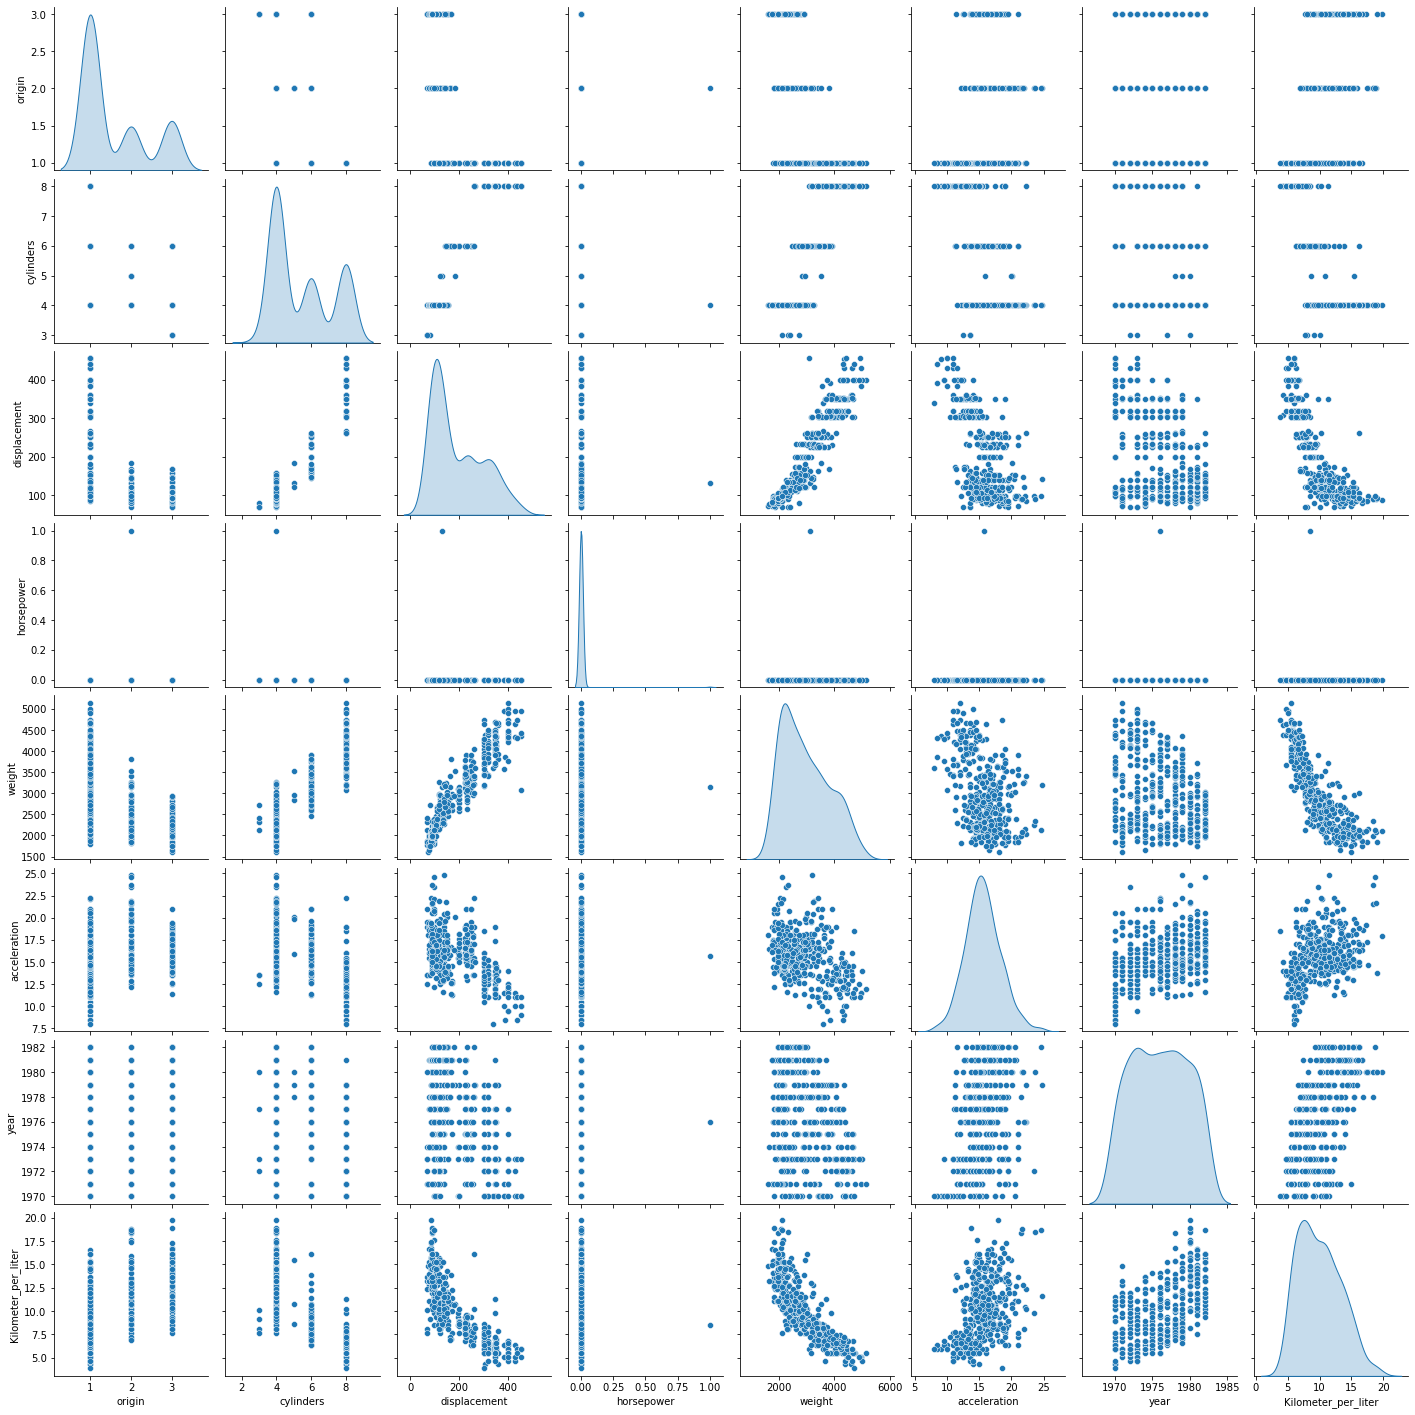

In [13]:
sns.pairplot(df,diag_kind='kde') #pairplot represents pairwise relation across the entire dataframe.
plt.show()

Regression plots(regplot()) creates a regression line between 2 parameters and helps to visualize their linear relationship

<AxesSubplot:xlabel='cylinders', ylabel='Kilometer_per_liter'>

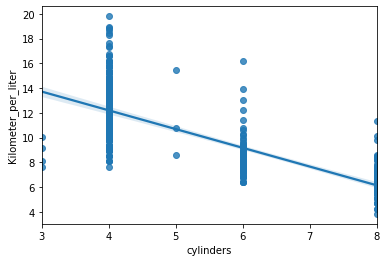

In [14]:
sns.regplot(x="cylinders", y="Kilometer_per_liter", data=df)

In [15]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'Kilometer_per_liter'],
      dtype='object')

<AxesSubplot:xlabel='origin', ylabel='Kilometer_per_liter'>

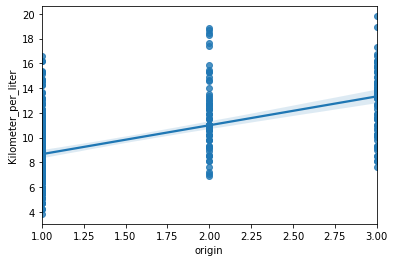

In [16]:
sns.regplot(x="origin", y="Kilometer_per_liter", data=df)

<AxesSubplot:xlabel='displacement', ylabel='Kilometer_per_liter'>

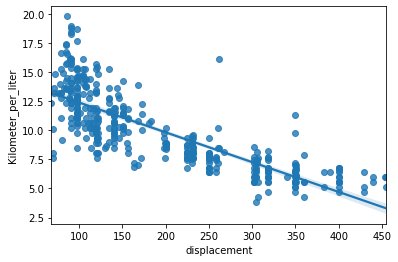

In [17]:
sns.regplot(x="displacement", y="Kilometer_per_liter", data=df)

<AxesSubplot:xlabel='horsepower', ylabel='Kilometer_per_liter'>

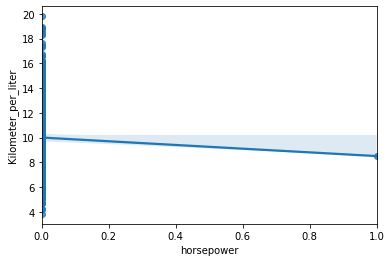

In [18]:
sns.regplot(x="horsepower", y="Kilometer_per_liter", data=df)

<AxesSubplot:xlabel='weight', ylabel='Kilometer_per_liter'>

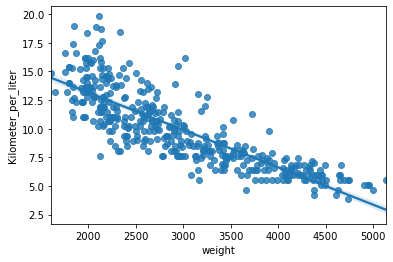

In [19]:
sns.regplot(x="weight", y="Kilometer_per_liter", data=df)

<AxesSubplot:xlabel='acceleration', ylabel='Kilometer_per_liter'>

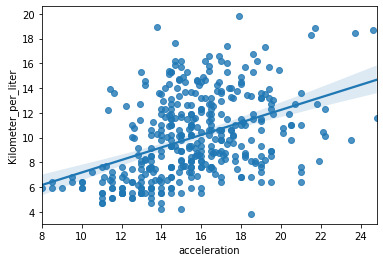

In [20]:
sns.regplot(x="acceleration", y="Kilometer_per_liter", data=df)

<AxesSubplot:xlabel='year', ylabel='Kilometer_per_liter'>

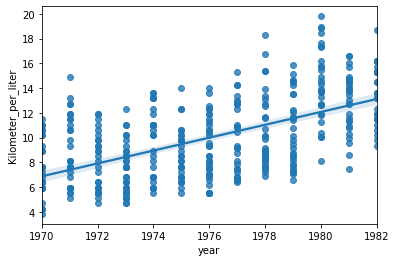

In [21]:
sns.regplot(x="year", y="Kilometer_per_liter", data=df)

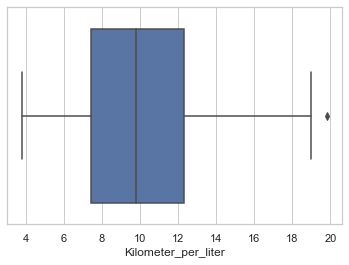

In [22]:
sns.set(style="whitegrid")
sns.boxplot(x=df['Kilometer_per_liter'])
plt.show()

# Spliting into Dependent and Independent variables

In [23]:
#Independent Variable/Feature Columns
X=df.drop(columns='Kilometer_per_liter')

In [24]:
#Dependent Variable/Target Variable
y=df['Kilometer_per_liter']

In [25]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [29]:
x_train.shape

(318, 7)

In [30]:
x_test.shape

(80, 7)

In [31]:
y_train.shape

(318,)

In [32]:
y_test.shape

(80,)


# Model Building

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
reg=LinearRegression()

In [35]:
reg.fit(x_train,y_train)

LinearRegression()

In [36]:
y_train_pred=reg.predict(x_train)
y_test_pred=reg.predict(x_test)

In [37]:
from sklearn.metrics import r2_score,mean_squared_error

In [38]:
def metric(y_actual,y_pred):
  r2=r2_score(y_actual,y_pred)
  rmse=np.sqrt(mean_squared_error(y_actual,y_pred))
  print('R2 Value:- {} | RMSE Value:- {}'.format(round(r2,2),round(rmse,2)))

In [39]:
print("Train Data")
metric(y_train,y_train_pred)
print("Test Data")
metric(y_test,y_test_pred)

Train Data
R2 Value:- 0.81 | RMSE Value:- 1.46
Test Data
R2 Value:- 0.87 | RMSE Value:- 1.17


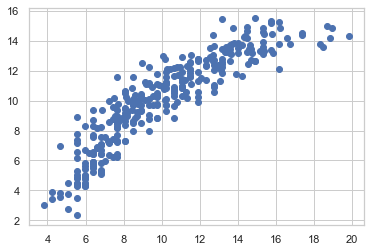

In [40]:
plt.scatter(y_train,y_train_pred)

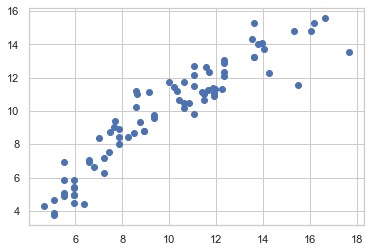

In [41]:
plt.scatter(y_test,y_test_pred)

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

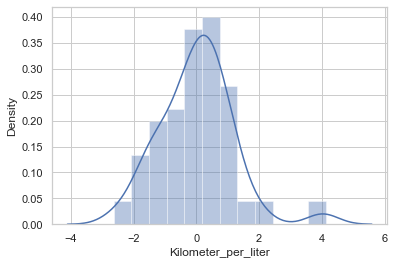

In [42]:
sns.distplot((y_test-y_test_pred))

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

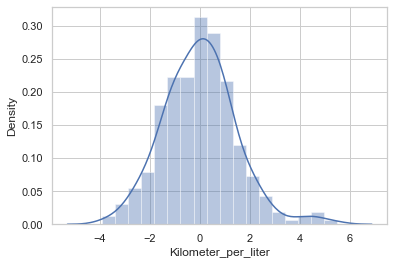

In [43]:
sns.distplot((y_train-y_train_pred))

# Model 2:Decision Tree Regressor¶

In [50]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=1,criterion="mae")
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mae', random_state=1)

In [63]:
y_train_pred=dt.predict(x_train)
y_test_pred=dt.predict(x_test)

In [64]:
print("Train Data")
metric(y_train,y_train_pred)
print("Test Data")
metric(y_test,y_test_pred)

Train Data
R2 Value:- 1.0 | RMSE Value:- 0.0
Test Data
R2 Value:- 0.83 | RMSE Value:- 1.32


# Model 3:Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
RF_reg=RandomForestRegressor()

In [46]:
RF_reg.fit(x_train,y_train)

RandomForestRegressor()

In [47]:
y_train_pred=RF_reg.predict(x_train)
y_test_pred=RF_reg.predict(x_test)

In [48]:
print("Train Data")
metric(y_train,y_train_pred)
print("Test Data")
metric(y_test,y_test_pred)

Train Data
R2 Value:- 0.98 | RMSE Value:- 0.47
Test Data
R2 Value:- 0.9 | RMSE Value:- 1.03


# Hyperparameter Tuning

In [53]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [56]:
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [59]:
rf_random = RandomizedSearchCV(estimator = RF_reg, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1, verbose=2)

In [60]:
rf_random.best_params_

{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}

# Final Model:Random Forest Regressor

In [65]:
y_train_pred=rf_random.predict(x_train)
y_test_pred=rf_random.predict(x_test)

In [66]:
print("Train Data")
metric(y_train,y_train_pred)
>print("Test Data")
metric(y_test,y_test_pred)

Train Data
R2 Value:- 0.98 | RMSE Value:- 0.43
Test Data
R2 Value:- 0.91 | RMSE Value:- 0.93



<B>Conclusion:</B>

When comparing models, the model with the higher R-squared value is a better fit for the data.

When comparing models, the model with the smallest MSE value is a better fit for the data.

Comparing these three models, we conclude that the Random Forest model is the best model to be able to predict "Kilometer_per_liter" from our dataset.